# Praktikum M4 Data Mining II: Crawling Wikipedia

### Nama: Amalika Ari Anindya
### NIM: 164221029
### Kelas: Data Mining II SD-A2

1. Lakukan seluruh percobaan pada modul ini dan berikan analisis yang kalian temukan
2. Jelaskan perbedaan hasil dari Preprocessing menggunakan NLTK, TextBlob, dan Sastrawi dan berikan contohnya

Dikerjakan pada file satunya

3. Crawling dataset dengan total 10 pada berbagai judul artikel Wikipedia berdasarkan daftar topik sesuai dengan akhiran nim dan wajib dalam topik yang sama

NIM 29 mendapat topik 09 yaitu TV Indonesia https://id.wikipedia.org/wiki/Daftar_stasiun_televisi_di_Indonesia

In [3]:
import wikipedia
import csv

wikipedia.set_lang("id")

judul = ["TVRI (saluran televisi)", "GTV (Indonesia)", "Indosiar", "Antv", "Trans7", "NET.", 
         "Kompas TV", "CNN Indonesia", "MNCTV", "Nusantara TV"] 

with open('wikipedia_pages.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Judul", "Konten"])

    for i in judul:
        try:
            halaman = wikipedia.page(i)
            konten = halaman.content 
            writer.writerow([i, konten])
            print(f"Berhasil menyimpan: {i}")
        except wikipedia.exceptions.DisambiguationError as e:
            print(f"Disambiguasi untuk: {i} - Dilewati")
        except wikipedia.exceptions.PageError as e:
            print(f"Halaman tidak ditemukan untuk: {i} - Dilewati")

Berhasil menyimpan: TVRI (saluran televisi)
Berhasil menyimpan: GTV (Indonesia)
Berhasil menyimpan: Indosiar
Berhasil menyimpan: Antv
Berhasil menyimpan: Trans7
Berhasil menyimpan: NET.
Berhasil menyimpan: Kompas TV
Berhasil menyimpan: CNN Indonesia
Berhasil menyimpan: MNCTV
Berhasil menyimpan: Nusantara TV


In [4]:
import pandas as pd
data = pd.read_csv("wikipedia_pages.csv")
data

Judul                                             Konten
0  TVRI (saluran televisi)  TVRI (terkadang disebut sebagai TVRI Nasional)...
1          GTV (Indonesia)  GTV (pelafalan dalam bahasa Indonesia: [dʒitif...
2                 Indosiar  Indosiar (secara resmi bernama Indosiar Visual...
3                     Antv  ANTV (pelafalan dalam bahasa Indonesia: [antɛf...
4                   Trans7  Trans7 (sebelumnya bernama TV7) adalah sebuah ...
5                     NET.  NET. (disebut juga sebagai NET TV; singkatan d...
6                Kompas TV  Kompas TV adalah salah satu jaringan televisi ...
7            CNN Indonesia  CNN Indonesia adalah sebuah jaringan televisi ...
8                    MNCTV  MNCTV (pelafalan dalam bahasa Indonesia: [emen...
9             Nusantara TV  Nusantara TV (digayakan dengan huruf kecil sem...

4. Lakukan preprocessing yang sudah diajarkan pada modul ini (menggunakan salah satu library saja). 

In [5]:
import nltk
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() #tokenisasi kalimat
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r' [^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) #menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in data["Konten"]:
    docs_clear.append(preprocess(d))

In [6]:
print(docs_clear)

["tvri ( terkadang disebut sebagai tvri nasional ) adalah saluran televisi publik nasional utama yang dimiliki oleh lpp televisi republik indonesia . mulai mengudara sejak 24 agustus 1962 ( yang menjadikannya saluran televisi pertama di indonesia yang bersiaran ) , tvri menayangkan aneka ragam program , mulai dari berita , informasi , hiburan hingga olahraga dalam waktu siar 24 jam setiap hari . saluran ini sebelumnya berjaringan dengan stasiun tvri daerah di siaran analog ( kecuali jakarta dan sekitarnya ) hingga tahun 2022 , dan kini bersiaran secara penuh dan mandiri di siaran digital . == sejarah == === awal bersiaran === tvri didirikan oleh pemerintah indonesia dalam rangka menyambut pesta olahraga asia 1962 . siaran percobaannya dimulai dengan menayangkan acara hari kemerdekaan republik indonesia ke-17 pada tanggal 17 agustus 1962 . acara tersebut disiarkan dari halaman istana merdeka di jalan medan merdeka , jakarta pusat , dengan format hitam-putih dan didukung pemancar cadanga

In [7]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = []
for i in docs_clear:
    stop = stopword.remove(i)
    kalimat.append(stop)
print(kalimat)
print(type(kalimat))
print(len(kalimat))

["tvri ( terkadang disebut tvri nasional ) saluran televisi publik nasional utama dimiliki lpp televisi republik indonesia . mulai mengudara sejak 24 agustus 1962 ( menjadikannya saluran televisi pertama indonesia bersiaran ) , tvri menayangkan aneka ragam program , mulai berita , informasi , hiburan hingga olahraga waktu siar 24 jam hari . saluran sebelumnya berjaringan stasiun tvri daerah siaran analog ( jakarta sekitarnya ) hingga tahun 2022 , kini bersiaran penuh mandiri siaran digital . == sejarah == === awal bersiaran === tvri didirikan pemerintah indonesia rangka menyambut pesta olahraga asia 1962 . siaran percobaannya dimulai menayangkan acara hari kemerdekaan republik indonesia ke-17 tanggal 17 agustus 1962 . acara tersebut disiarkan halaman istana merdeka jalan medan merdeka , jakarta pusat , format hitam-putih didukung pemancar cadangan berkekuatan 100 watt tiga kamera . siaran dipancarkan kanal 5 vhf , diberi nama saluran lima , selama 3 jam pukul 07:30-11:02 wib . tanggal 

# Stemming

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

hasil_stem = []
for i in kalimat:
    stemmers = stemmer.stem(i)
    hasil_stem.append(stemmers)
print(hasil_stem)

['tvri terkadang sebut tvri nasional salur televisi publik nasional utama milik lpp televisi republik indonesia mulai udara sejak 24 agustus 1962 jadi salur televisi pertama indonesia siar tvri tayang aneka ragam program mulai berita informasi hibur hingga olahraga waktu siar 24 jam hari salur belum jaring stasiun tvri daerah siar analog jakarta sekitar hingga tahun 2022 kini siar penuh mandiri siar digital sejarah awal siar tvri diri perintah indonesia rangka sambut pesta olahraga asia 1962 siar coba mulai tayang acara hari merdeka republik indonesia ke-17 tanggal 17 agustus 1962 acara sebut siar halaman istana merdeka jalan medan merdeka jakarta pusat format hitam-putih dukung pancar cadang kuat 100 watt tiga kamera siar pancar kanal 5 vhf beri nama salur lima lama 3 jam pukul 07 30-11 02 wib tanggal 17-23 agustus 1962 tvri laku siar coba pukul 19 00-20 00 wib lama minggu 24 agustus 1962 mulai siar pola teknik pukul 14 30 wib jam 16 00-19 00 wib tvri resmi udara pertama kali acara si

5. Buatlah wordcloud dan most common word barplot, interpretasikan hasilnya

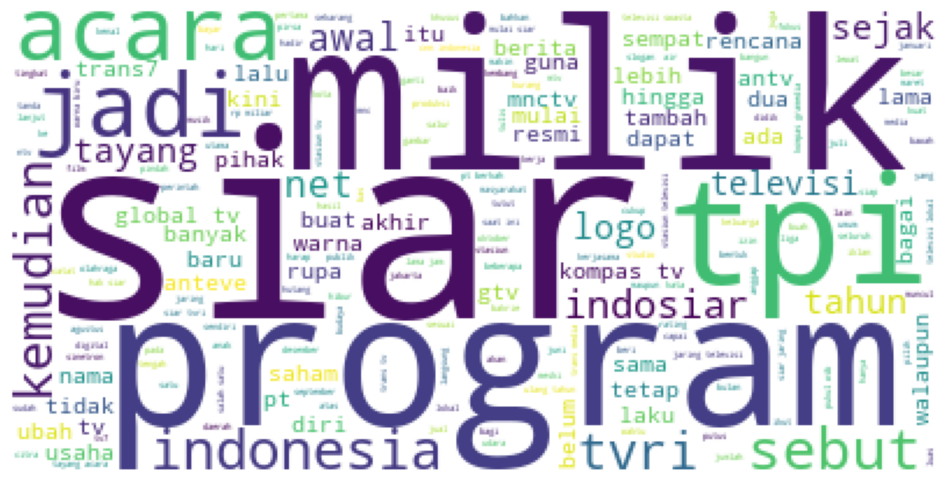

In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

hasil_string = ' '.join(hasil_stem)
wordcloud = WordCloud(background_color="white").generate(hasil_string)

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
plt.show()

## Barplot

In [10]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Tokenize the text into words
tokens = word_tokenize(hasil_string)

# Filter out words of length 1 or less
filtered_words = [word for word in tokens if len(word) > 1]

# Create a frequency distribution
fdist = FreqDist(filtered_words)

# Display the most common words
print(fdist.most_common(10))

[('siar', 536), ('tv', 317), ('televisi', 266), ('acara', 239), ('indonesia', 236), ('milik', 184), ('tahun', 174), ('jadi', 173), ('program', 164), ('tvri', 161)]


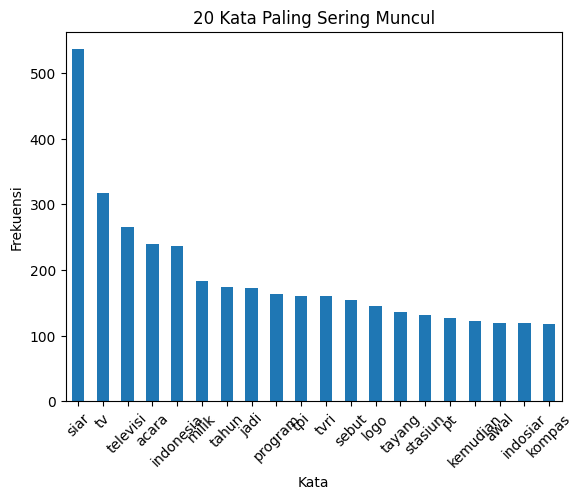

In [11]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_top_20 = df_freq_tokens.sort_values(by='Frequency', ascending=False).head(20)

df_top_20.plot(kind='bar', legend=False)
plt.title('20 Kata Paling Sering Muncul')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')
plt.xticks(rotation=45)
plt.show()

6. Lakukan clustering dengan menggunakan fitur TF-IDF. NIM 29 mendapatkan metode Hierarchical Clustering

## Clustering

### TF-IDF Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(hasil_stem)

7. Buat visualisasi clusternya dan lakukan interpretasi terhadap hasil tersebut

### Hierarchial Clustering

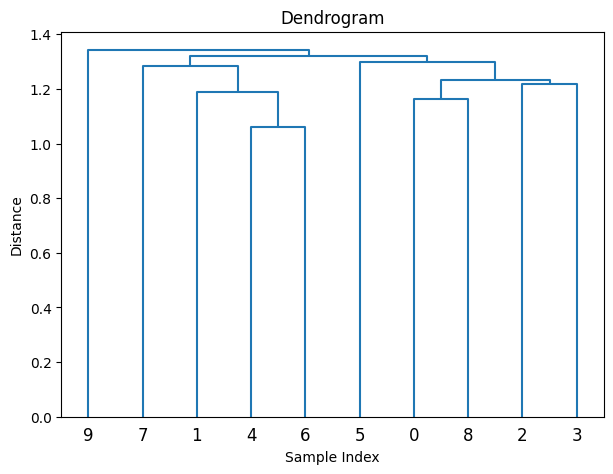

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create a linkage matrix
linked = linkage(tfidf_matrix.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(7,5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Dapat diputuskan dibagi menjadi 9 cluster

In [28]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters
num_clusters = 9

# Initialize AgglomerativeClustering with the number of clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')

# Fit the model and predict cluster labels
cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix.toarray())

# Display the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[8 7 6 5 0 3 0 4 2 1]


In [29]:
# Menampilkan judul dokumen per cluster
clusters = {i: [] for i in range(num_clusters)}
for idx, label in enumerate(cluster_labels):
    clusters[label].append(hasil_stem[idx])
    
# Mencetak judul dokumen untuk setiap cluster
for cluster_id, titles in clusters.items():
    print(f"\nCluster {cluster_id}:")
    for title in titles:
        print(f" - {title}")


Cluster 0:
 - trans7 belum nama tv7 buah jaring televisi swasta nasional indonesia trans7 awal guna nama tv7 laku siar perdana terestrial jakarta 25 november 2001 pukul 17 00 wib tanggal 4 agustus 2006 trans corp jajak kerja sama strategis kompas gramedia akuisisi saham tv7 laku relaunch luncur ulang tanggal 15 desember 2006 pukul 19 00 wib guna nama baru jadi trans7 sejarah awal diri siar awal trans7 rencana lahir nama tv7 nama duta visual nusantara televisi singkat dvn tv izin keluar 25 oktober 1999 nomor 797 mp pm 1999 hasil umum seleksi diri televisi swasta 12 oktober 1999 departemen terang sama 4 televisi swasta nasional trans tv prtv gib mti tv televisi baru milik h sukoyo orang usaha tambak udang jawa timur sama 3 pihak rupa rekan bisnis pager starpage kemudian sukoyo putus jual izin diri televisi milik kelompok kompas gramedia besar 80 kompas gramedia catat milik dvn tv lewat tiga usaha milik pt teletransmedia 48 pt transito tatamedia 38 7 pt duta panca pesona 3 3 sukoyo kuasa

In [30]:
num_samples = tfidf_matrix.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 10


8. Gunakan validasi menggunakan salah satu Davies-Bouldin index atau Silhouette score

In [33]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(tfidf_matrix.toarray(), cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.017


In [34]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin index
db_index = davies_bouldin_score(tfidf_matrix.toarray(), cluster_labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.48917432814279305


Nilai DBI mendekati 0 sehingga nilai cluster sudah baik.

# Wordcloud per Cluster

## Cluter pertama

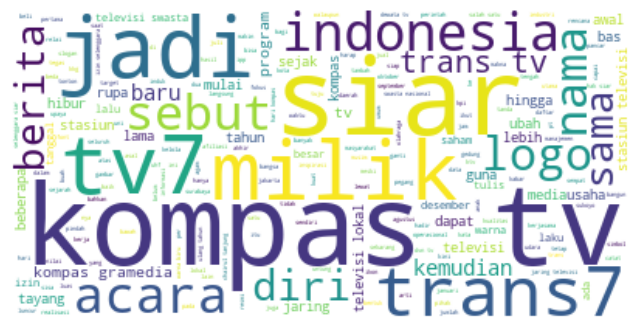

In [35]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua judul artikel dalam cluster menjadi satu string
cluster_text = ' '.join(clusters[0])

# Buat WordCloud dari gabungan teks
wordcloud = WordCloud(background_color="white").generate(cluster_text)

# Plot the WordCloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')

# To remove the axis value
plt.axis("off")
plt.show()

## Cluster kedua

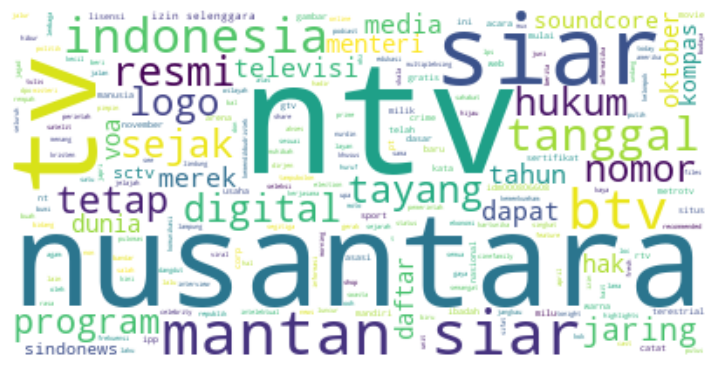

In [36]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[1])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(9, 9))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster ketiga

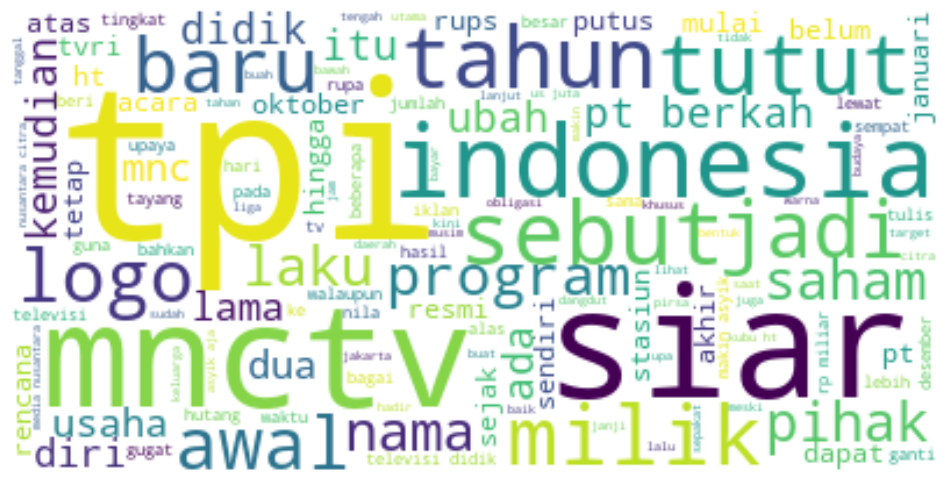

In [37]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[2])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster keempat

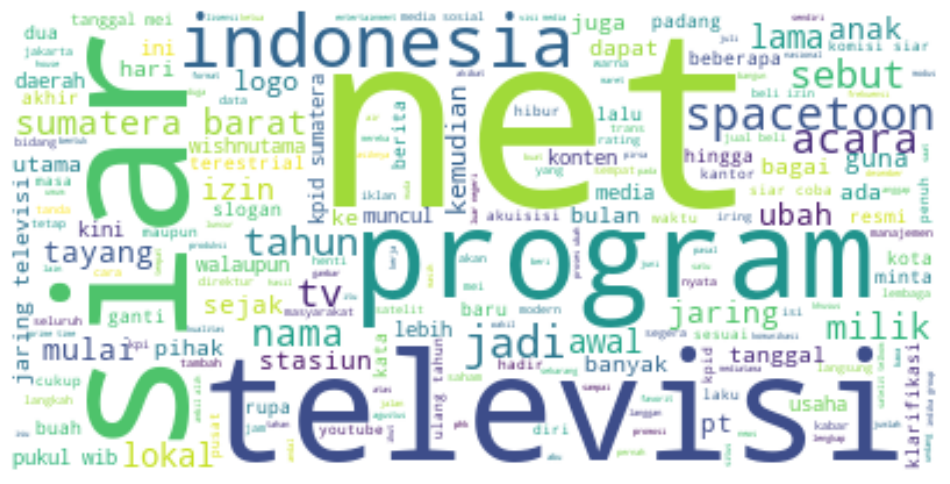

In [38]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[3])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster kelima

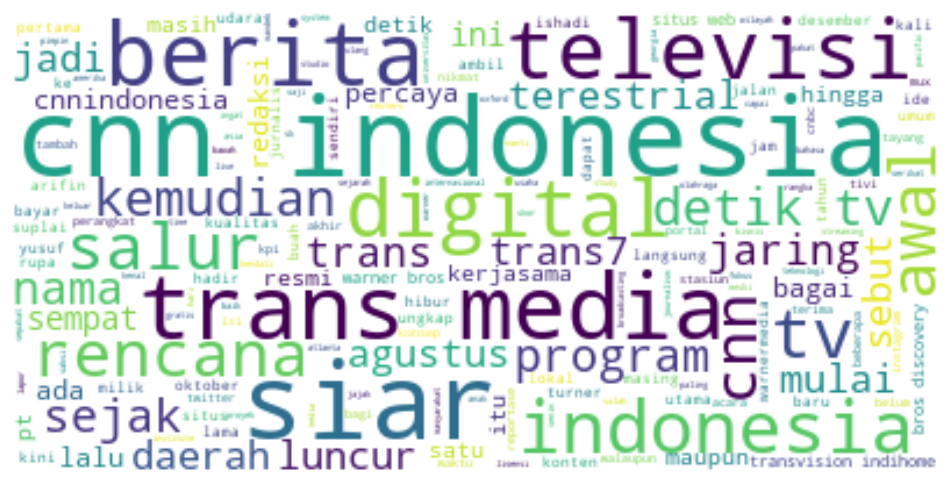

In [39]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[4])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster keenam

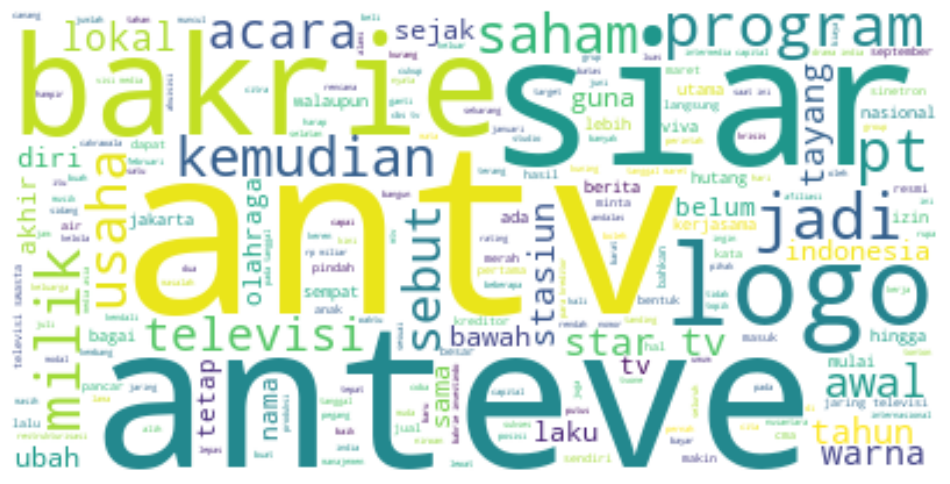

In [40]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[5])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster ketujuh

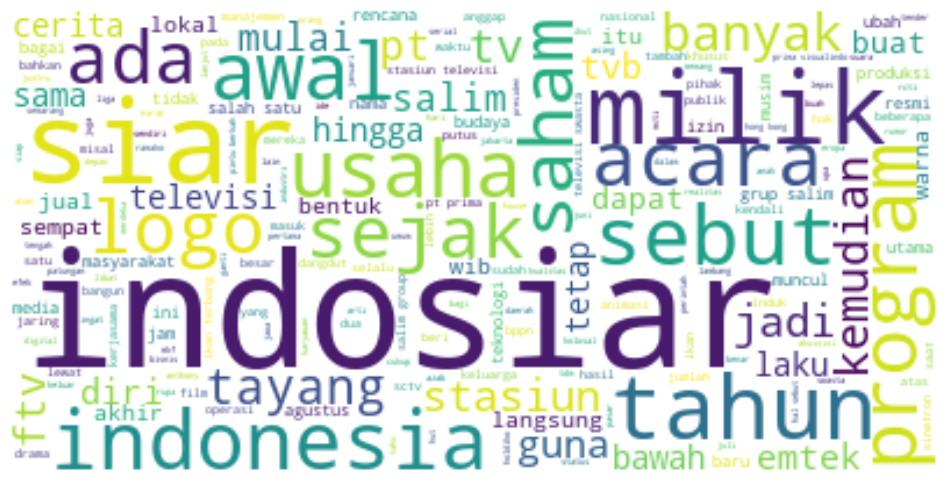

In [41]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[6])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster Kedelapan

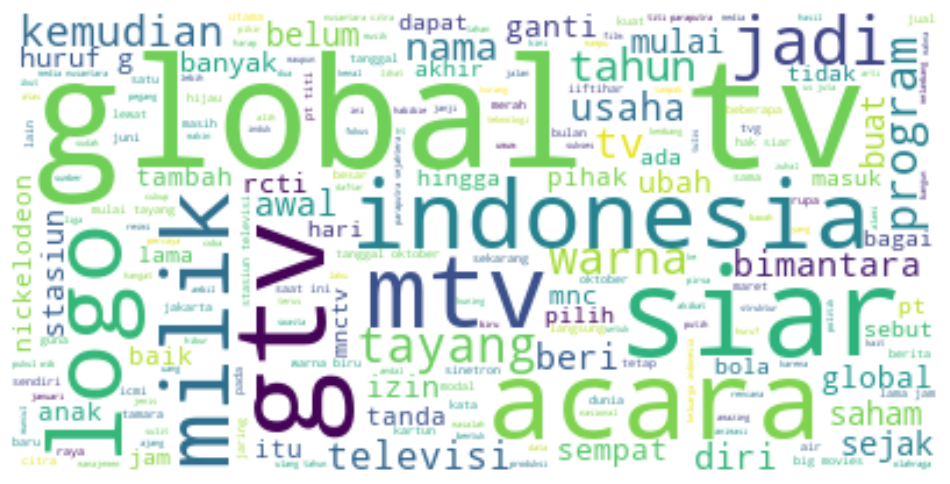

In [42]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[7])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

## Cluster Kesembilan

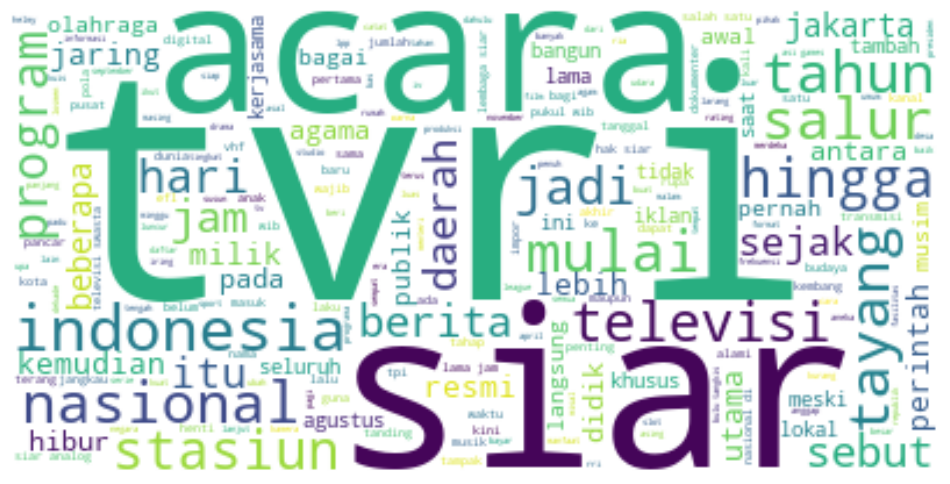

In [43]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

cluster_text = ' '.join(clusters[8])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()